validate synapse ratios

In [1]:
import os 
import copy
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import fxsdata
from fxsdata import fxs_mouse

In [2]:
%matplotlib notebook
#%matplotlib inline

In [3]:
num_queries = 4 
query_names = ['Synapsin, PSD95', 'Synapsin, VGluT1, PSD95', 'Synapsin, VGluT2, PSD95', 'Synapsin, VGluT1, VGluT2, PSD95']
region_names = ['F000', 'F001', 'F002', 'F003']
layer_names = ['Layer1', 'Layer2', 'Layer3', 'Layer4']
z_spans = [1, 2, 3]
style_name = 'seaborn-whitegrid'
xticklabels = ['2ss v 3ss', '4ss v 6ss', '5ss v 7ss', '2ss (second) v 1ss']
plot_titles = query_names
row_labels = ['Q0', 'Q1', 'Q2', 'Q3']

Load data into fxs_mouse objects 

In [4]:
list_of_mice = []
mice_dict = {} 

name = '2ss'
fn = '/Users/anish/Documents/yi_mice/excel/2ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_2ss = fxs_mouse(name)
mouse_2ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_2ss)
mice_dict[name] = mouse_2ss

name = '3ss'
fn = '/Users/anish/Documents/yi_mice/excel/3ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'KO'
mouse_3ss = fxs_mouse(name)
mouse_3ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_3ss)
mice_dict[name] = mouse_3ss


name = '4ss'
fn = '/Users/anish/Documents/yi_mice/excel/4ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_4ss = fxs_mouse(name)
mouse_4ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_4ss)
mice_dict[name] = mouse_4ss


name = '5ss'
fn = '/Users/anish/Documents/yi_mice/excel/5ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_5ss = fxs_mouse(name)
mouse_5ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_5ss)
mice_dict[name] = mouse_5ss


name = '6ss'
fn = '/Users/anish/Documents/yi_mice/excel/6ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_6ss = fxs_mouse(name)
mouse_6ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_6ss)
mice_dict[name] = mouse_6ss


name = '7ss'
fn = '/Users/anish/Documents/yi_mice/excel/7ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_7ss = fxs_mouse(name)
mouse_7ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_7ss)
mice_dict[name] = mouse_7ss


name = '1ss'
fn = '/Users/anish/Documents/yi_mice/excel/1ss_fragX.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
mouse_1ss = fxs_mouse(name)
mouse_1ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_1ss)
mice_dict[name] = mouse_1ss


name = '22ss'
fn = '/Users/anish/Documents/yi_mice/excel/22ss_fragX.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
mouse_22ss = fxs_mouse(name)
mouse_22ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(mouse_22ss)
mice_dict[name] = mouse_22ss


36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
36 48
24 36
12 24
0 12


In [5]:
fn = '/Users/anish/Documents/yi_mice/excel/vglut2/2ss_fragX_vglut2.xlsx'
mouse_2ss = fxsdata.update_vglut2_queries(mouse_2ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/3ss_fragX_vglut2.xlsx'
mouse_3ss = fxsdata.update_vglut2_queries(mouse_3ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/4ss_fragX_vglut2.xlsx'
mouse_4ss = fxsdata.update_vglut2_queries(mouse_4ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/6ss_fragX_vglut2.xlsx'
mouse_6ss = fxsdata.update_vglut2_queries(mouse_6ss, fn, layer_order = 'forward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/5ss_fragX_vglut2.xlsx'
mouse_5ss = fxsdata.update_vglut2_queries(mouse_5ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/7ss_fragX_vglut2.xlsx'
mouse_7ss = fxsdata.update_vglut2_queries(mouse_7ss, fn, layer_order = 'forward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/22ss_fragX_vglut2.xlsx'
mouse_22ss = fxsdata.update_vglut2_queries(mouse_22ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/1ss_fragX_vglut2.xlsx'
mouse_1ss = fxsdata.update_vglut2_queries(mouse_1ss, fn, layer_order = 'forward')

In [6]:
# Q3 in the speadsheet is the inhibitory query. The following code switches it to the last excitatory query

In [7]:
num_queries_in_fn = 1
qlist = ['q4']

fn = '/Users/anish/Documents/yi_mice/excel/2ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_2ss = fxsdata.add_query_to_mouse(mouse_2ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/3ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_3ss = fxsdata.add_query_to_mouse(mouse_3ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/4ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_4ss = fxsdata.add_query_to_mouse(mouse_4ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/5ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_5ss = fxsdata.add_query_to_mouse(mouse_5ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/6ss_inhibitory_fragX.xlsx'
layer_order = 'forward'
mouse_6ss = fxsdata.add_query_to_mouse(mouse_6ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/7ss_inhibitory_fragX.xlsx'
layer_order = 'forward'
mouse_7ss = fxsdata.add_query_to_mouse(mouse_7ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/1ss_inhibitory_fragX.xlsx'
layer_order = 'forward'
mouse_1ss = fxsdata.add_query_to_mouse(mouse_1ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/22ss_inhibitory_fragX.xlsx'
layer_order = 'backward'
mouse_22ss = fxsdata.add_query_to_mouse(mouse_22ss, fn, num_queries_in_fn, qlist, layer_order)

In [8]:
# Add small synapses (1slice-2slice to the calculations)
mouse_2ss = fxsdata.compute_small_synapses(mouse_2ss)
mouse_3ss = fxsdata.compute_small_synapses(mouse_3ss)
mouse_4ss = fxsdata.compute_small_synapses(mouse_4ss)
mouse_5ss = fxsdata.compute_small_synapses(mouse_5ss)
mouse_6ss = fxsdata.compute_small_synapses(mouse_6ss)
mouse_7ss = fxsdata.compute_small_synapses(mouse_7ss)
mouse_1ss = fxsdata.compute_small_synapses(mouse_1ss)
mouse_22ss = fxsdata.compute_small_synapses(mouse_22ss)


In [9]:
# Add medium synapses (2slice-3slice to the calculations)
mouse_2ss = fxsdata.compute_medium_synapses(mouse_2ss)
mouse_3ss = fxsdata.compute_medium_synapses(mouse_3ss)
mouse_4ss = fxsdata.compute_medium_synapses(mouse_4ss)
mouse_5ss = fxsdata.compute_medium_synapses(mouse_5ss)
mouse_6ss = fxsdata.compute_medium_synapses(mouse_6ss)
mouse_7ss = fxsdata.compute_medium_synapses(mouse_7ss)
mouse_1ss = fxsdata.compute_medium_synapses(mouse_1ss)
mouse_22ss = fxsdata.compute_medium_synapses(mouse_22ss)


In [10]:
# Combine multiple mice into an average mouse for each type

In [11]:
wt_mouse_list = [mouse_2ss, mouse_4ss, mouse_5ss, mouse_22ss]
mouse_name = 'wildtype'
wt_mouse = fxsdata.average_mice(wt_mouse_list, mouse_name, row_labels)

In [12]:
ko_mouse_list = [mouse_3ss, mouse_6ss, mouse_7ss, mouse_1ss]
mouse_name = 'knockout'
ko_mouse = fxsdata.average_mice(ko_mouse_list, mouse_name, row_labels)

In [13]:
query_list = ['q0', 'q1', 'q2', 'q3', 'q4']

In [14]:
# Generate average df and p values

## AVERAGE LAYERS

In [15]:
query_list = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']

# Average Layers

# Add small synapses (1slice-2slice to the calculations)
avg_layer_mouse_2ss = fxsdata.average_mouse_layers(mouse_2ss, query_list)
avg_layer_mouse_3ss = fxsdata.average_mouse_layers(mouse_3ss, query_list)
avg_layer_mouse_4ss = fxsdata.average_mouse_layers(mouse_4ss, query_list)
avg_layer_mouse_5ss = fxsdata.average_mouse_layers(mouse_5ss, query_list)
avg_layer_mouse_6ss = fxsdata.average_mouse_layers(mouse_6ss, query_list)
avg_layer_mouse_7ss = fxsdata.average_mouse_layers(mouse_7ss, query_list)
avg_layer_mouse_1ss = fxsdata.average_mouse_layers(mouse_1ss, query_list)
avg_layer_mouse_22ss = fxsdata.average_mouse_layers(mouse_22ss, query_list)

query_list

avg_layer_wt_mouse_list = [avg_layer_mouse_2ss, avg_layer_mouse_4ss, avg_layer_mouse_5ss, avg_layer_mouse_22ss]
mouse_name = 'wildtype'
avg_layer_wt_mouse = fxsdata.average_layer_mice(avg_layer_wt_mouse_list, mouse_name, row_labels)

avg_layer_ko_mouse_list = [avg_layer_mouse_3ss, avg_layer_mouse_6ss, avg_layer_mouse_7ss, avg_layer_mouse_1ss]
mouse_name = 'knockout'
avg_layer_ko_mouse = fxsdata.average_layer_mice(avg_layer_ko_mouse_list, mouse_name, row_labels)

In [16]:
size_keys = avg_layer_mouse_2ss['Q0']['average'].keys()

In [17]:
layerslist = avg_layer_mouse_2ss['Q0'].keys()

In [18]:
inhibitory_fraction = []
rlist = [] 
sizekey = '1'
for mouse in avg_layer_wt_mouse_list: 
    foo = mouse['Q4']['average_L1'][sizekey]/(mouse['Q0']['average_L1'][sizekey] + mouse['Q4']['average_L1'][sizekey])
    rlist.append(foo)
inhibitory_fraction.append((rlist))   
print(np.mean(rlist))

rlist = [] 
for mouse in avg_layer_wt_mouse_list: 
    foo = mouse['Q4']['average_L23'][sizekey]/(mouse['Q0']['average_L23'][sizekey] + mouse['Q4']['average_L23'][sizekey])
    rlist.append(foo)
print(np.mean(rlist))
inhibitory_fraction.append((rlist))   


rlist = [] 
for mouse in avg_layer_wt_mouse_list: 
    foo = mouse['Q4']['average_L4'][sizekey]/(mouse['Q0']['average_L4'][sizekey]+mouse['Q4']['average_L4'][sizekey])
    rlist.append(foo)
inhibitory_fraction.append((rlist))   
print(np.mean(rlist))

0.1254294202933035
0.15142469040463108
0.20256692695929332


In [19]:
inhibitory_fraction

[[0.12615701062735685,
  0.1374979135369721,
  0.14010347429310532,
  0.09795928271577974],
 [0.16071202816194366,
  0.14010942036462232,
  0.15170750501123118,
  0.15316980808072708],
 [0.21166512726556944,
  0.20010753952917845,
  0.2038270006019591,
  0.19466804044046623]]

<IPython.core.display.Javascript object>


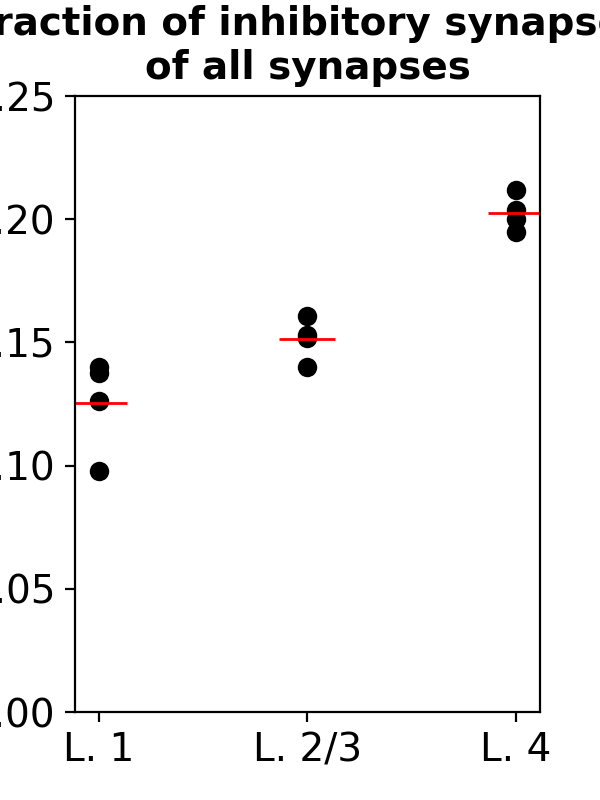

In [30]:
plt.figure(figsize=(3, 4))
for n in range(1, 4):
    plt.scatter(n*np.ones((4, 1)), inhibitory_fraction[n-1], color='black')
    plt.plot(n, np.mean(inhibitory_fraction[n-1]), markersize=20, marker = "_", color='red', label='wildtype')


ax = plt.gca()
ax.grid(False)
plt.yticks(fontsize=14)
plt.ylim([0, 0.25])
plt.xticks([1, 2, 3], ['L. 1', 'L. 2/3', 'L. 4'], fontsize=14, rotation=-0) 
plt.ylabel('Fraction of inhibitory synapses', fontsize=14, fontweight='bold')
plt.title('Fraction of inhibitory synapses\nof all synapses', fontsize=14, fontweight='bold')
plt.savefig('figs/wildtype-figs/inhibitory_fraction.png', dpi=300, bbox_inches='tight')  

In [21]:
vglut2_fraction = []
rlist = [] 
sizekey = '1'
for mouse in avg_layer_wt_mouse_list: 
    foo = mouse['Q2']['average_L1'][sizekey]/(mouse['Q0']['average_L1'][sizekey])
    rlist.append(foo)
vglut2_fraction.append((rlist))   
print(np.mean(rlist))

rlist = [] 
for mouse in avg_layer_wt_mouse_list: 
    foo = mouse['Q2']['average_L23'][sizekey]/(mouse['Q0']['average_L23'][sizekey])
    rlist.append(foo)
print(np.mean(rlist))
vglut2_fraction.append((rlist))   


rlist = [] 
for mouse in avg_layer_wt_mouse_list: 
    foo = mouse['Q2']['average_L4'][sizekey]/(mouse['Q0']['average_L4'][sizekey])
    rlist.append(foo)
vglut2_fraction.append((rlist))   
print(np.mean(rlist))

0.04271623352144553
0.1046489937028828
0.20643975376247825


<IPython.core.display.Javascript object>


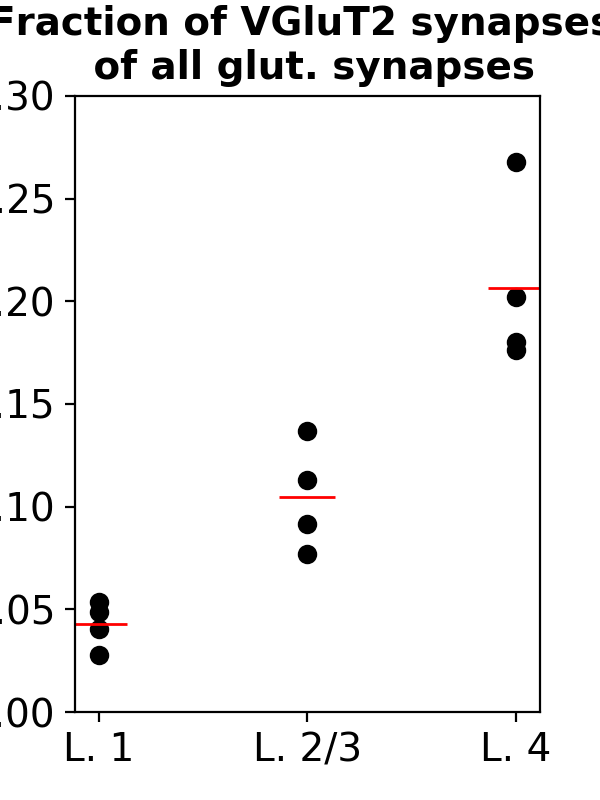

In [32]:
fig = plt.figure(figsize=(3, 4))
for n in range(1, 4):
    plt.scatter(n*np.ones((4, 1)), vglut2_fraction[n-1], color='black')
    plt.plot(n, np.mean(vglut2_fraction[n-1]), markersize=20, marker = "_", color='red', label='wildtype')


ax = plt.gca()
ax.grid(False)
plt.yticks(fontsize=14)
plt.ylim([0, 0.3])
plt.xticks([1, 2, 3], ['L. 1', 'L. 2/3', 'L. 4'], fontsize=14) 
plt.ylabel('Fraction of VGluT2 synapses', fontsize=14, fontweight='bold')
plt.title('Fraction of VGluT2 synapses \n of all glut. synapses', fontsize=14, fontweight='bold')
plt.savefig('figs/wildtype-figs/vglut2_fraction.png', dpi=300, bbox_inches='tight')  

In [23]:
wt_data = [] 
sizekey = '1'
for mouse in avg_layer_wt_mouse_list: 
    foo = mouse['Q0']['average'][sizekey]/(mouse['Q4']['average'][sizekey])
    wt_data.append(foo)
print(np.mean(wt_data))

ko_data = [] 
for mouse in avg_layer_ko_mouse_list: 
    foo = mouse['Q0']['average_L23'][sizekey]/(mouse['Q4']['average_L23'][sizekey])
    ko_data.append(foo)
print(np.mean(ko_data))

pval = scipy.stats.ttest_ind(wt_data, ko_data)
pval = pval.pvalue

5.24352993387165
6.195999911268219


In [24]:
pval

0.04394011087012562

<IPython.core.display.Javascript object>


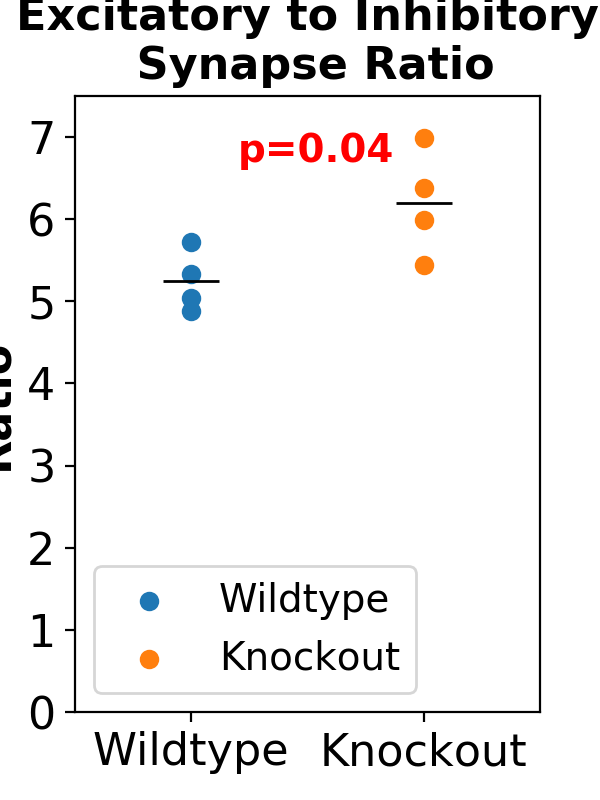

wildtype mean:  5.24352993387165  std:  0.3216411282875562
knockout mean:  6.195999911268219  std:  0.5635676495812422


In [25]:
fig = plt.figure(figsize=(3, 4))
p0 = plt.scatter(np.zeros((4, 1)),wt_data, color='C0')
print('wildtype mean: ', np.mean(wt_data), ' std: ', np.std(wt_data))
plt.plot(0, np.mean(wt_data), markersize=20, marker = "_", color='black', label='wildtype')

p1 = plt.scatter(1*np.ones((4, 1)),ko_data, color='C1')
plt.plot(1, np.mean(ko_data), markersize=20, marker = "_", color='black', label='wildtype')
plt.text(.2, 6.7, 'p=0.04', color='red', fontweight='bold', fontsize=14)
print('knockout mean: ', np.mean(ko_data), ' std: ', np.std(ko_data))

ax = plt.gca()
ax.grid(False)
plt.yticks(fontsize=16)
plt.xticks([0, 1], ['Wildtype', 'Knockout'], fontsize=16) 
plt.xlim([-0.5, 1.5])
plt.ylim([0, 7.5])
plt.ylabel('Ratio', fontweight='bold', fontsize=16)
plt.title('Excitatory to Inhibitory\n Synapse Ratio', fontsize=16, fontweight='bold')
plt.legend([p0, p1], ['Wildtype', 'Knockout'], frameon=True, loc='lower left', fontsize=14)


plt.savefig('figs/wildtype-figs/excit_inhib_ratio.png', dpi=300, bbox_inches='tight')  

In [26]:
np.round(6.195999911268219, 3)

6.196